##  Polynomial regression- Overfitting and underfitting

## Simulate data
Simulate from a 2nd order polynomial with Gaussian noise i.e.

In [17]:

import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + .5*x + 3 
y= f(X) + np.random.randn(samples,1) # adds an epsilon standard normally distributed
f(X).shape,X.shape

((100, 1), (100, 1))

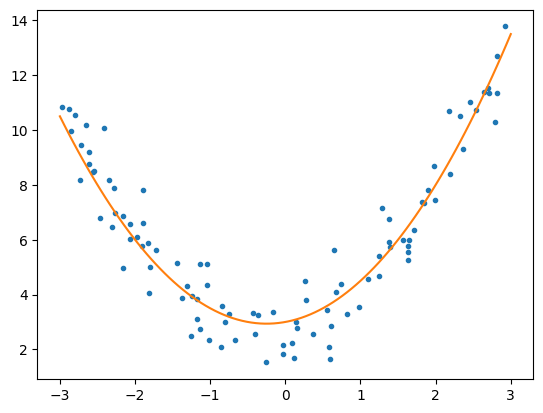

In [18]:
x = np.linspace(-3,3,100).reshape(100,1)
plt.plot(X,y, '.',)
plt.plot(x,f(x))

<Axes: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}, xlabel='x', ylabel='y'>

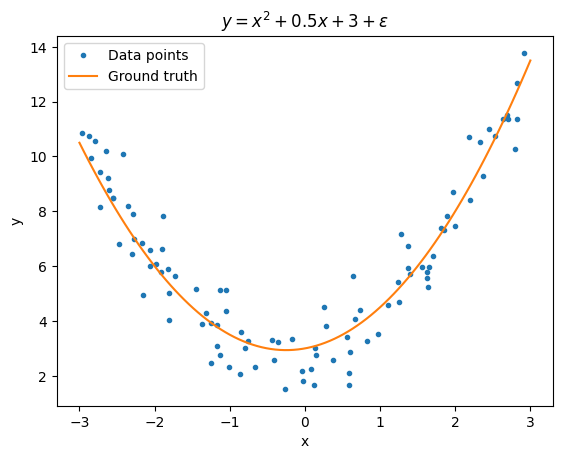

In [19]:

def draw_data():
    fig,ax = plt.figure(dpi = 100),plt.axes()
    ax.plot(X,y, '.', label="Data points")

    x = np.linspace(-3,3,100).reshape(-1,1)
    ax.plot(x, f(x), label = "Ground truth")

    ax.set(title=r"$y = x^2 + 0.5x + 3 + \epsilon$", xlabel = "x", ylabel = "y")
    ax.legend()

    return ax

draw_data()

## Polynomial regression
Feature engineering
- Constructs features artificially

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures creates feature matrix to represent the polynomial combinations
polynomial_instance = PolynomialFeatures(degree = 2, include_bias=False)

poly_features = polynomial_instance.fit_transform(X)
poly_features[:4], X[:4],.75**2, 2.7**2

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091]]),
 0.5625,
 7.290000000000001)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)
model.coef_ # beta_1, beta_2

array([[0.43366893, 1.06456263]])

In [22]:
model.intercept_

array([2.78134581])

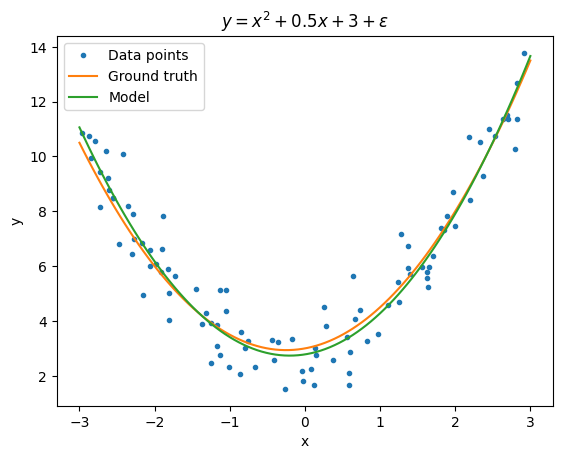

In [23]:
x = np.linspace(-3,3, samples).reshape(-1,1)
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend()

## Underfitting

[Text(0.5, 1.0, 'Underfitting, model too simple')]

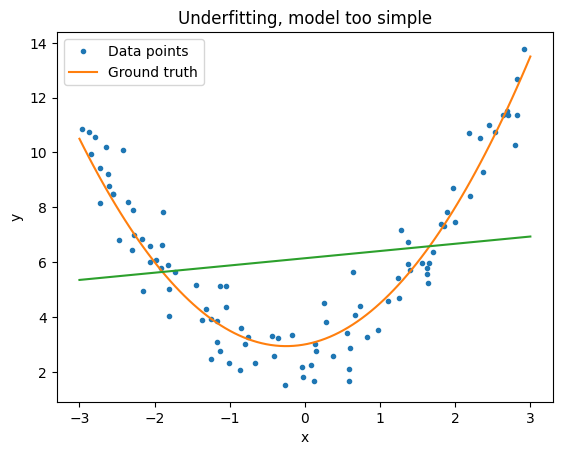

In [24]:
model = LinearRegression()
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple")

## Overfitting

(100, 30)


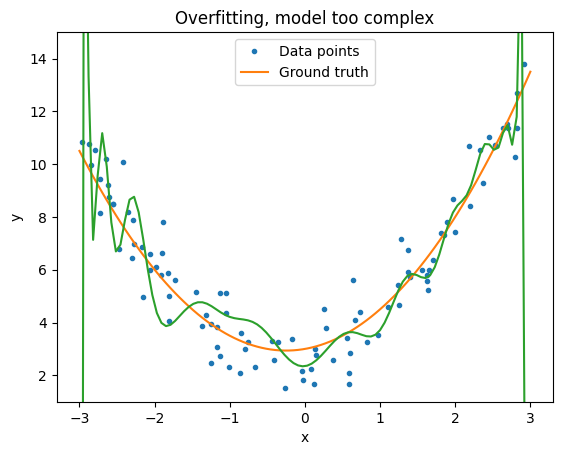

In [25]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

x_poly_features = poly_model_30.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15]);

# The model captures more points in training data but can't generalize to test data 

## Choose a model

In [26]:
np.random.seed(42)


samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x ** 4 + x ** 2 + 0.5 * x + 3
y = f(X) + np.random.randn(samples, 1)

X.shape, y.shape

((10000, 1), (10000, 1))

## Train|val|test split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

## Elbow

In [28]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train) # feature engineering on train data
    val_features = model_poly.transform(X_val) # feature engineering on validation data
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

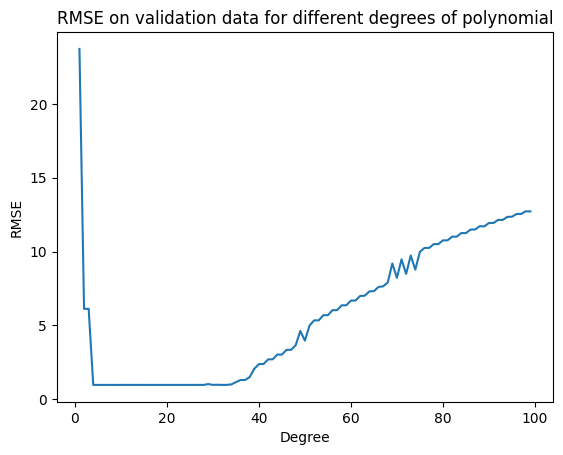

In [29]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

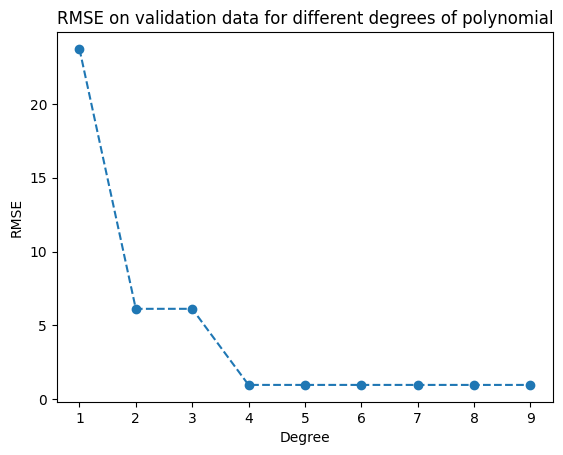

In [30]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")